<img src="images/usm.jpg" width="480" height="240" align="left"/>

# MAT281 - Laboratorios N°07

## Objetivos del laboratorio

* Reforzar conceptos básicos de regresión lineal.

## Contenidos

* [Problema 01](#p1)


<a id='p1'></a>
## I.- Problema 01


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b6/Anscombe.svg/1200px-Anscombe.svg.png" width="360" height="360" align="center"/>



El **cuarteto de Anscombe** comprende cuatro conjuntos de datos que tienen las mismas propiedades estadísticas, pero que evidentemente son distintas al inspeccionar sus gráficos respectivos.

Cada conjunto consiste de once puntos (x, y) y fueron construidos por el estadístico F. J. Anscombe. El cuarteto es una demostración de la importancia de mirar gráficamente un conjunto de datos antes de analizarlos.

In [10]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [11]:
# cargar datos
df = pd.read_csv(os.path.join("data","anscombe.csv"), sep=",")
df.head()

,x,y,grupo
0,10,8.04,Grupo_1
1,8,6.95,Grupo_1
2,13,7.58,Grupo_1
3,9,8.81,Grupo_1
4,11,8.33,Grupo_1


Basado en la información presentada responda las siguientes preguntas:

1. Gráfique mediante un gráfico tipo **scatter** cada grupo. A simple vista, ¿ los grupos son muy distintos entre si?.
2. Realice un resumen de las medidas estadísticas más significativas ocuapando el comando **describe** para cada grupo. Interprete.
3. Realice un ajuste lineal para cada grupo. Además, grafique los resultados de la regresión lineal para cada grupo. Interprete.
4. Calcule los resultados de las métricas para cada grupo. Interprete.
5. Es claro que el ajuste lineal para algunos grupos no es el correcto. Existen varias formas de solucionar este problema (eliminar outliers, otros modelos, etc.). Identifique una estrategia para que el modelo de regresión lineal ajuste de mejor manera e implemente otros modelos en los casos que encuentre necesario.  

## Parte 1

In [12]:
##DATOS DE ENTRADA 
grupo1=df[df['grupo']=='Grupo_1'] 
grupo2=df[df['grupo']=='Grupo_2'] 
grupo3=df[df['grupo']=='Grupo_3'] 
grupo4=df[df['grupo']=='Grupo_4'] 
x=grupo1['x']
x4=grupo4['x']
y1=grupo1['y']
y2=grupo2['y']
y3=grupo3['y']
y4=grupo4['y']

Text(0.5, 1.0, 'Grupo 4')

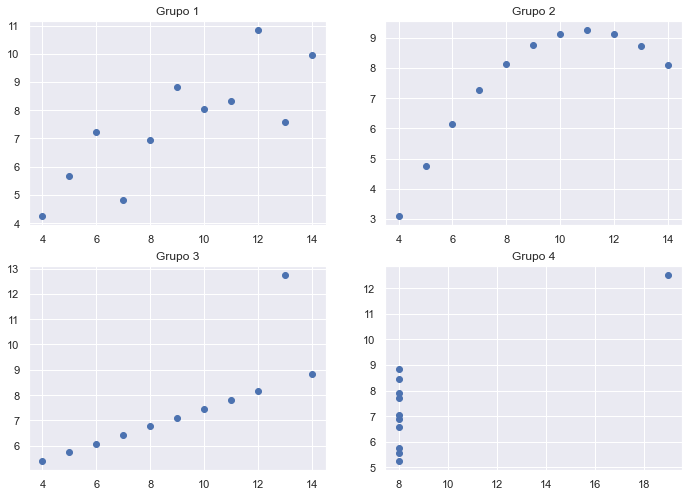

In [13]:
fig,axs=plt.subplots(2,2)
axs[0,0].scatter(x,y1)
axs[0,0].set_title('Grupo 1')
axs[0,1].scatter(x,y2)
axs[0,1].set_title('Grupo 2')
axs[1,0].scatter(x,y3)
axs[1,0].set_title('Grupo 3')
axs[1,1].scatter(x4,y4)
axs[1,1].set_title('Grupo 4')

Los datos varían mucho entre sí, por ejemplo el grupo 4 básicamente no necesita una regresión lineal porque es una recta vertical salvo por ese punto alejado, en la prática este último debería ser corregido o eliminado del dataframe.
El grupo 2 y el 3, podrían ajustarse a una regresión polinómica (orden 2 o 3) y lineal respectivamente, el 3 tiene un punto muy alejado por lo que, omitilo o corregirlo es necesario si se buscar mejorar los parámetro de regresión.
El grupo 1, muestra gran variabilidad entre datos, pero visualmente se podría ajustar con una regresión lineal, sin problemas.

## Parte 2

In [14]:
grupo1.describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031568
min,4.000000,4.260000
25%,6.500000,6.315000
50%,9.000000,7.580000
75%,11.500000,8.570000
max,14.000000,10.840000


In [15]:
grupo2.describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031657
min,4.000000,3.100000
25%,6.500000,6.695000
50%,9.000000,8.140000
75%,11.500000,8.950000
max,14.000000,9.260000


In [16]:
grupo3.describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500000
std,3.316625,2.030424
min,4.000000,5.390000
25%,6.500000,6.250000
50%,9.000000,7.110000
75%,11.500000,7.980000
max,14.000000,12.740000


In [17]:
grupo4.describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.030579
min,8.000000,5.250000
25%,8.000000,6.170000
50%,8.000000,7.040000
75%,8.000000,8.190000
max,19.000000,12.500000


el valor medio de x, es el mismo en los tres primeros, esto ocurre porque la columna consta de los mismos datos
Para el grupo 4, la media es 9 pero la mayoría de los datos es 8, esto ocurre por el dato extremo.(con esto el grupo 4 queda con la mayor media en el eje x)
Del mismo modo, la desviación estándar en x es mayor que en y, esto se justificar de igual forma que el anterior.


## Parte 3

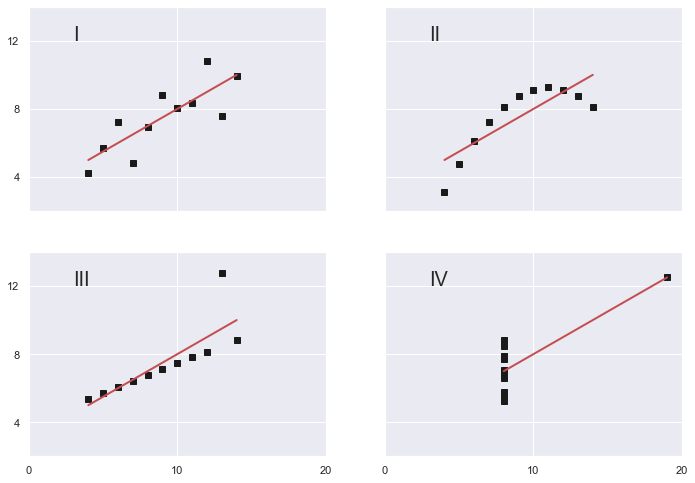

In [18]:
#Gráfico
x=grupo1['x']
x4=grupo4['x']
y1=grupo1['y']
y2=grupo2['y']
y3=grupo3['y']
y4=grupo4['y']
def fit(x):
    return 3 + 0.5 * x

fig, axs = plt.subplots(2, 2, sharex=True, sharey=True)
axs[0, 0].set(xlim=(0, 20), ylim=(2, 14))
axs[0, 0].set(xticks=(0, 10, 20), yticks=(4, 8, 12))

xfit = np.array([np.min(x), np.max(x)])
axs[0, 0].plot(x, y1, 'ks', xfit, fit(xfit), 'r-', lw=2)
axs[0, 1].plot(x, y2, 'ks', xfit, fit(xfit), 'r-', lw=2)
axs[1, 0].plot(x, y3, 'ks', xfit, fit(xfit), 'r-', lw=2)
xfit = np.array([np.min(x4), np.max(x4)])
axs[1, 1].plot(x4, y4, 'ks', xfit, fit(xfit), 'r-', lw=2)

for ax, label in zip(axs.flat, ['I', 'II', 'III', 'IV']):
    ax.label_outer()
    ax.text(3, 12, label, fontsize=20)

plt.show()

Se podría concluir que la regresión lineal es buena solo para el III, 

## Parte 4

In [19]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# import some data to play with

X = grupo1[['x']]
y = grupo1['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.linear_model import LinearRegression
model_rl = LinearRegression() # Creando el modelo.
model_rl.fit(X_train, y_train) 
beta_0 = round(model_rl.intercept_,2)
beta_1 = round(model_rl.coef_[0],2)
Y_predict = model_rl.predict(X_test)
from metrics_regression import *
from sklearn.metrics import r2_score

# ejemplo 
df_temp = pd.DataFrame(
    {
        'y':y_test,
        'yhat': model_rl.predict(X_test)
        }
)

df_metrics = summary_metrics(df_temp)
df_metrics['r2'] =  round(r2_score(y_test, model_rl.predict(X_test)),4)
print(df_metrics)

      mae     mse    rmse   mape   maape   wmape   mmape   smape      r2
0  0.7161  1.2576  1.1214  0.142  0.1354  0.0941  0.1182  0.1196  0.7204


In [20]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# import some data to play with

X = grupo2[['x']]
y = grupo2['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.linear_model import LinearRegression
model_rl = LinearRegression() # Creando el modelo.
model_rl.fit(X_train, y_train) 
beta_0 = round(model_rl.intercept_,2)
beta_1 = round(model_rl.coef_[0],2)
Y_predict = model_rl.predict(X_test)
from metrics_regression import *
from sklearn.metrics import r2_score

# ejemplo 
df_temp = pd.DataFrame(
    {
        'y':y_test,
        'yhat': model_rl.predict(X_test)
        }
)

df_metrics = summary_metrics(df_temp)
df_metrics['r2'] =  round(r2_score(y_test, model_rl.predict(X_test)),4)
print(df_metrics)

      mae     mse    rmse    mape   maape   wmape   mmape   smape      r2
0  1.4986  2.8504  1.6883  0.1851  0.1813  0.1835  0.1647  0.1752 -3.8207


In [21]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# import some data to play with

X = grupo3[['x']]
y = grupo3['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.linear_model import LinearRegression
model_rl = LinearRegression() # Creando el modelo.
model_rl.fit(X_train, y_train) 
beta_0 = round(model_rl.intercept_,2)
beta_1 = round(model_rl.coef_[0],2)
Y_predict = model_rl.predict(X_test)
from metrics_regression import *
from sklearn.metrics import r2_score

# ejemplo 
df_temp = pd.DataFrame(
    {
        'y':y_test,
        'yhat': model_rl.predict(X_test)
        }
)

df_metrics = summary_metrics(df_temp)
df_metrics['r2'] =  round(r2_score(y_test, model_rl.predict(X_test)),4)
print(df_metrics)

      mae     mse    rmse    mape   maape   wmape   mmape   smape      r2
0  0.9813  1.4548  1.2062  0.1196  0.1184  0.1296  0.1065  0.1105 -0.4807


In [22]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# import some data to play with

X = grupo4[['x']]
y = grupo4['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.linear_model import LinearRegression
model_rl = LinearRegression() # Creando el modelo.
model_rl.fit(X_train, y_train) 
beta_0 = round(model_rl.intercept_,2)
beta_1 = round(model_rl.coef_[0],2)
Y_predict = model_rl.predict(X_test)
from metrics_regression import *
from sklearn.metrics import r2_score

# ejemplo 
df_temp = pd.DataFrame(
    {
        'y':y_test,
        'yhat': model_rl.predict(X_test)
        }
)

df_metrics = summary_metrics(df_temp)
df_metrics['r2'] =  round(r2_score(y_test, model_rl.predict(X_test)),4)
print(df_metrics)

      mae     mse    rmse    mape   maape   wmape   mmape   smape      r2
0  0.4814  0.3671  0.6059  0.0644  0.0642  0.0671  0.0568  0.0668 -0.2071


## Parte 5

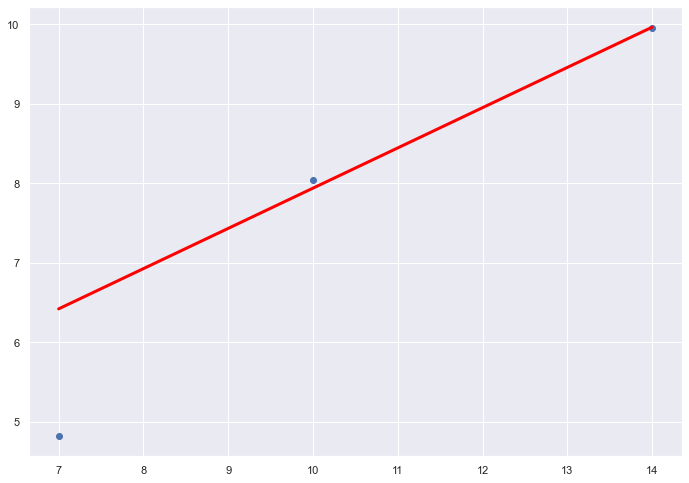

In [25]:
X = grupo1[['x']]
y = grupo1['y']

from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import PolynomialFeatures
poli_reg = PolynomialFeatures(degree=2)
X_train_poli=poli_reg.fit_transform(X_train)
X_test_poli=poli_reg.fit_transform(X_test)
pr = linear_model.LinearRegression()
Y_predict = model_rl.predict(X_test)
plt.scatter(X_test,y_test)
plt.plot(X_test,Y_predict,color='red',linewidth=3)
plt.show()

Se observa una mejora considerable en la aproximación